In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [4]:
alk_mask = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/masks/alkalinity_mask_y2050.nc')

In [5]:
mesh_mask = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/masks/mesh_mask.nc')

In [6]:
mesh_mask = mesh_mask.tmask.isel(t=0, z=0)

In [7]:
mask_alkalinity = mesh_mask + alk_mask.alk_flux

In [8]:
mesh_mask_region = mask_alkalinity.isel(x=slice(520,595),y=slice(330,435))

In [9]:
mesh_mask_study = (mask_alkalinity.where((-40 < mask_alkalinity.nav_lon) & (mask_alkalinity.nav_lon < 40) & (30 < mask_alkalinity.nav_lat) & (mask_alkalinity.nav_lat < 85), drop=True))

In [10]:
mesh_mask_region = mesh_mask_region.to_dataset(name='alk')
mesh_mask_study = mesh_mask_study.to_dataset(name='alk')

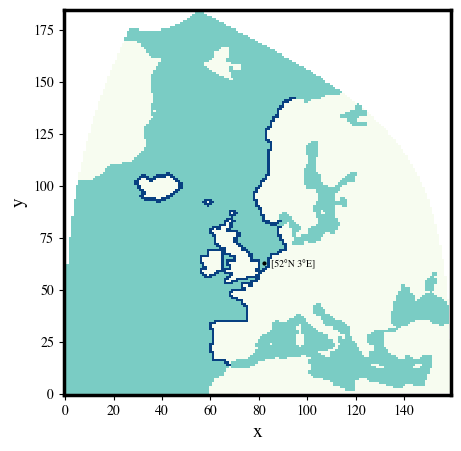

In [14]:
plt.figure(figsize=(5, 5))

im=mesh_mask_study.alk.plot.pcolormesh(
    add_colorbar=False, vmin = 0, vmax = 2, cmap='GnBu'
)

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.plot(82, 63, "o", color='black', markersize=2)
plt.text(85,61,'[52°N 3°E]', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/data_processing/masking/masked_figures/alkalinity_addition.png')

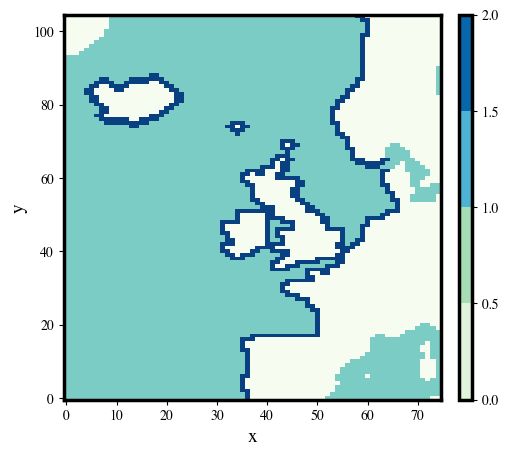

In [15]:
plt.figure(figsize=(6, 5))

im = mesh_mask_region.alk.plot.pcolormesh(
    add_colorbar=False, vmin = 0, vmax = 2, cmap='GnBu'
)

cbar = plt.colorbar(im, boundaries=np.linspace(0, 2, 5), aspect = 30, pad=0.04)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(10)

In [16]:
mesh_mask = mesh_mask.isel(x=slice(520,595),y=slice(330,435))

In [17]:
mesh_mask = mesh_mask.to_dataset(name='tmask')

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  import sys


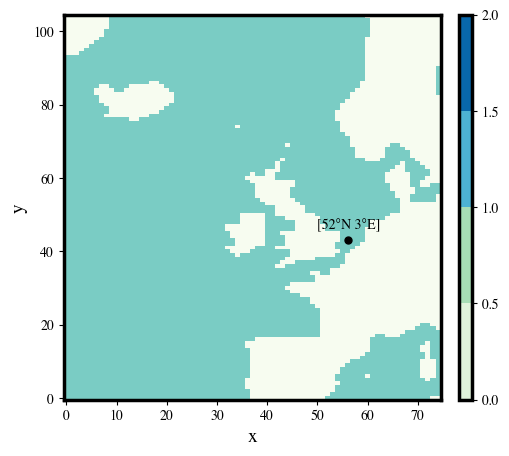

In [18]:
plt.figure(figsize=(6, 5))

mesh_mask.tmask.plot.pcolormesh(
    add_colorbar=False, vmin = 0, vmax = 2, cmap='GnBu'
)

cbar = plt.colorbar(im, boundaries=np.linspace(0, 2, 5), aspect = 30, pad=0.04)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.plot(56, 43, "o", color='black', markersize=5)
plt.text(50,46,'[52°N 3°E]', fontsize=10)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(10)

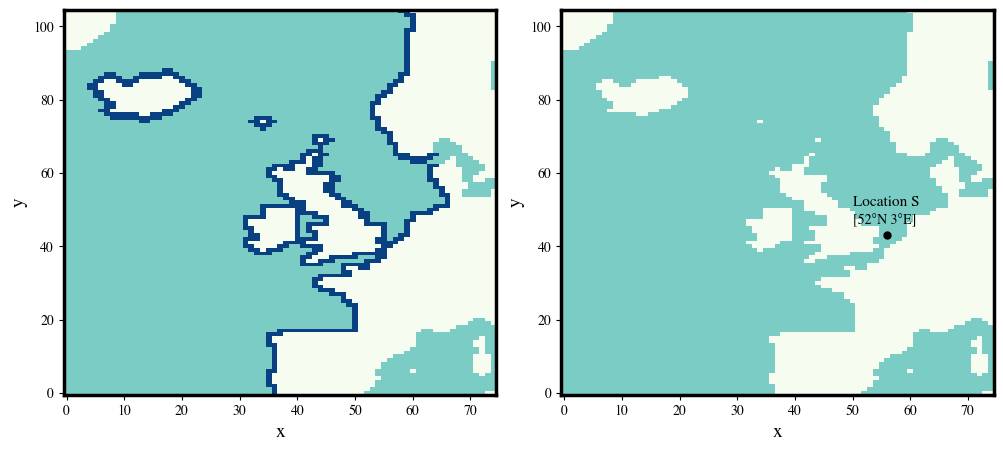

In [19]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.15, hspace=0)

im = mesh_mask_region.alk.plot.pcolormesh(
    ax=ax,
    add_colorbar=False, 
    vmin = 0, 
    vmax = 2, 
    cmap='GnBu'
)

im2 = mesh_mask.tmask.plot.pcolormesh(
    ax=ax2,
    add_colorbar=False, 
    vmin = 0, 
    vmax = 2, 
    cmap='GnBu'
)

font_size=10

ax.tick_params(labelsize=font_size)
ax2.tick_params(labelsize=font_size)

ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)

plt.plot(56, 43, "o", color='black', markersize=5)
plt.text(50,46,'[52°N 3°E]', fontsize=10)
plt.text(50,51,'Location S', fontsize=11)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/data_processing/masking/masked_figures/masking.png')